# Assignment: eCommerce Transactions Dataset

Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Loading Data

In [42]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

Basic Info

In [43]:
print("Customers Data Overview:")
customers.info()
customers.head()

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [44]:
print("\nProducts Data Overview:")
products.info()
products.head()


Products Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [45]:
print("\nTransactions Data Overview:")
transactions.info()
transactions.head()


Transactions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


Missing Values

In [46]:
print("\nMissing Values:")
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


Missing Values:


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [47]:
customers.fillna(method='bfill', inplace=True)
products.fillna(method='bfill', inplace=True)
transactions.fillna(0, inplace=True)

Convert Date columns to DateTime

In [48]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

Duplicate Check

In [49]:
print("\nDuplicate Records:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Records:
Customers: 0
Products: 0
Transactions: 0


Summary Stats

In [50]:
print("\nTransactions Summary Statistics:")
print(transactions.describe())


Transactions Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


Merging of Data

In [51]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

Data Analysis

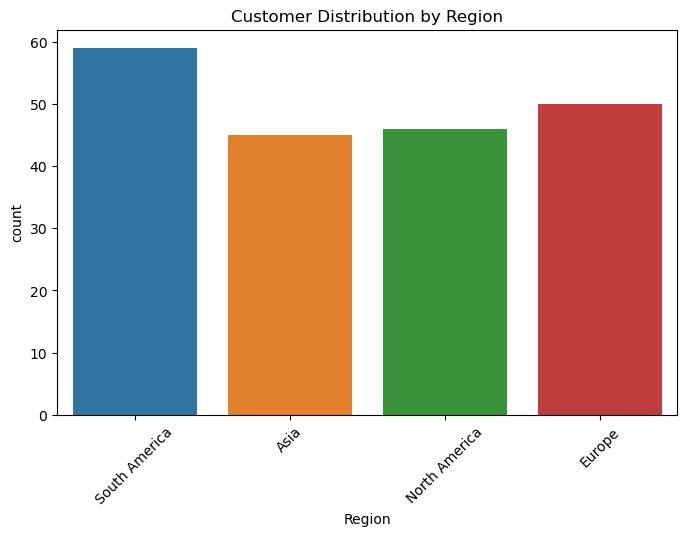

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

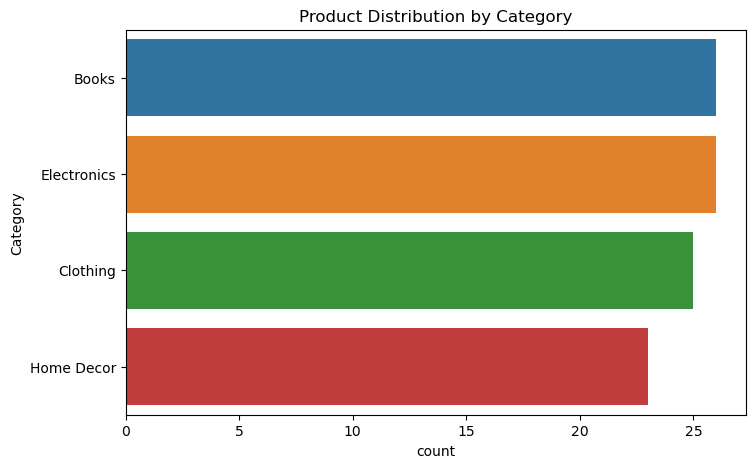

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.show()

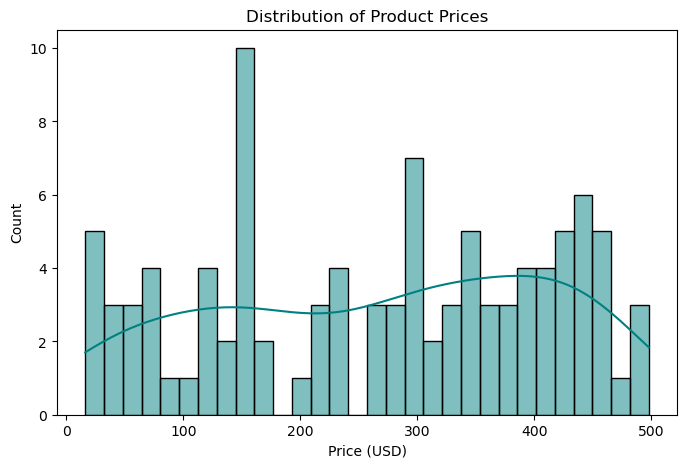

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=30, kde=True, color='teal')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.show()

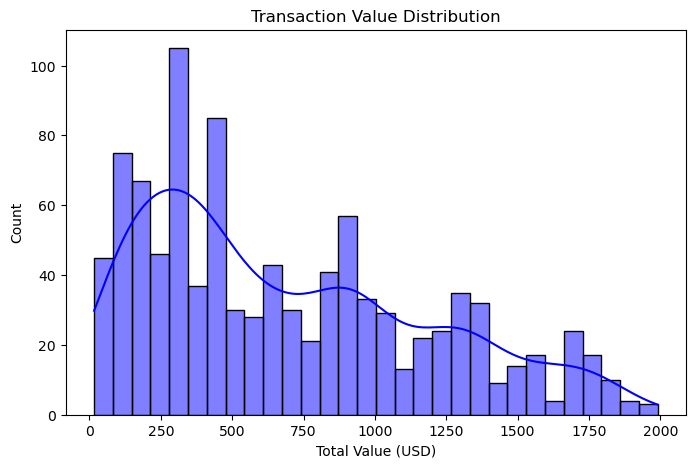

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value (USD)')
plt.show()

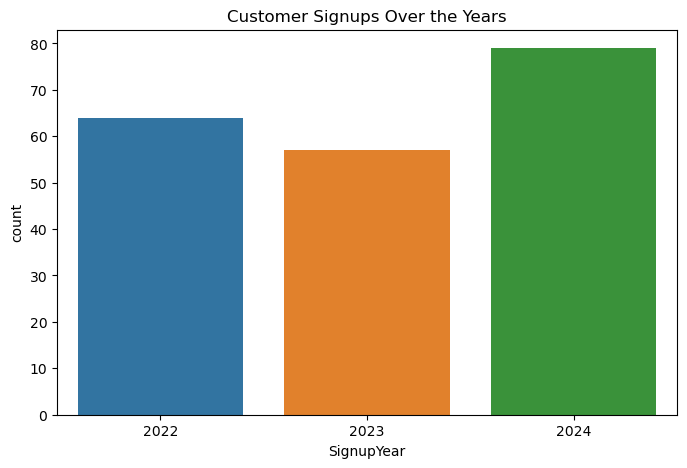

In [56]:
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(8, 5))
sns.countplot(x='SignupYear', data=customers)
plt.title('Customer Signups Over the Years')
plt.show()

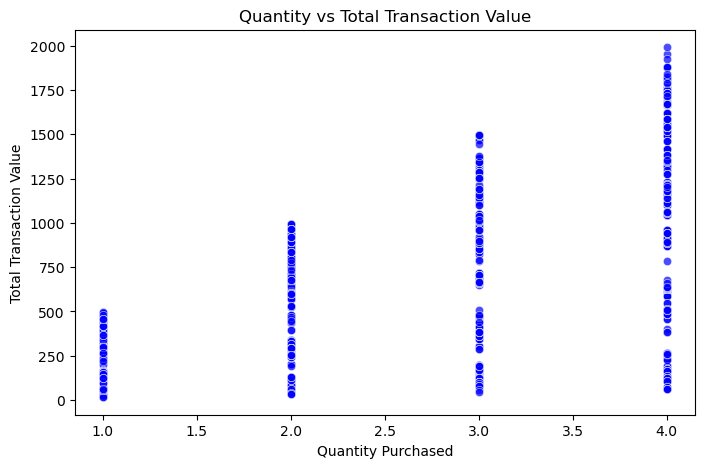

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions, alpha=0.7, color='blue')
plt.title('Quantity vs Total Transaction Value')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Transaction Value')
plt.show()

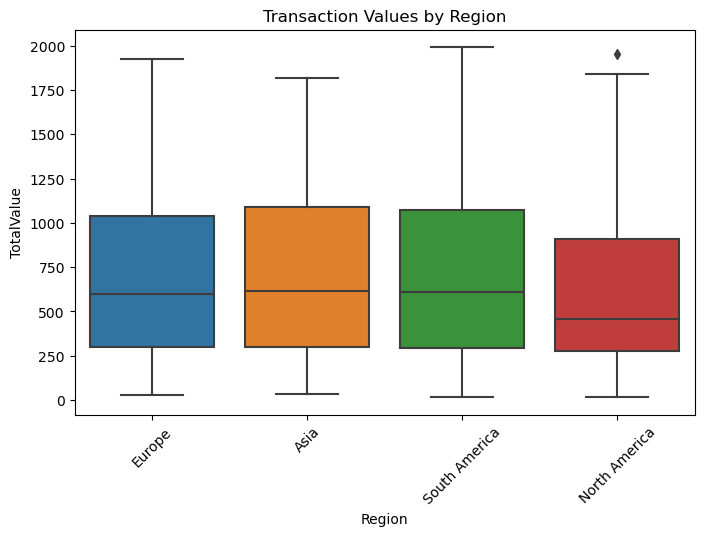

In [58]:
merged_data = transactions.merge(customers, on='CustomerID')
plt.figure(figsize=(8, 5))
sns.boxplot(x='Region', y='TotalValue', data=merged_data)
plt.title('Transaction Values by Region')
plt.xticks(rotation=45)
plt.show()

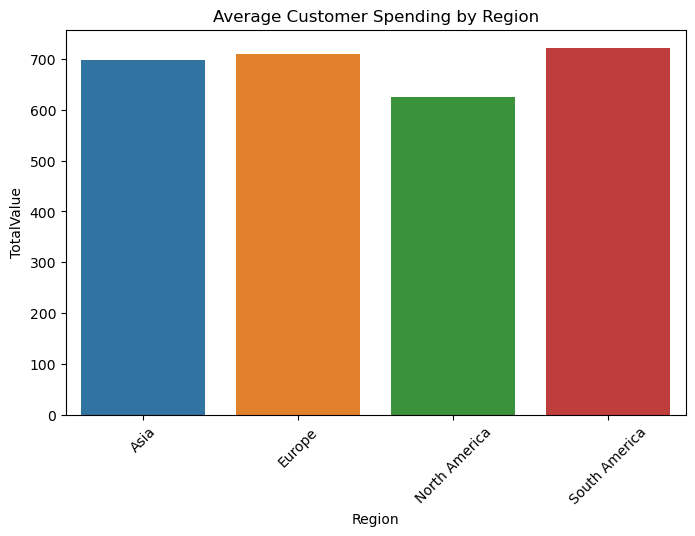

In [59]:
avg_spending = merged_data.groupby('Region')['TotalValue'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='TotalValue', data=avg_spending)
plt.title('Average Customer Spending by Region')
plt.xticks(rotation=45)
plt.show()

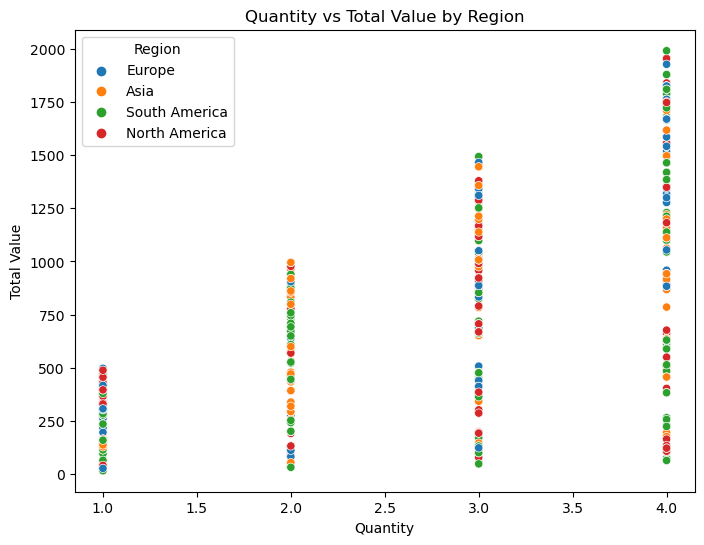

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', hue='Region', data=merged_data)
plt.title('Quantity vs Total Value by Region')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

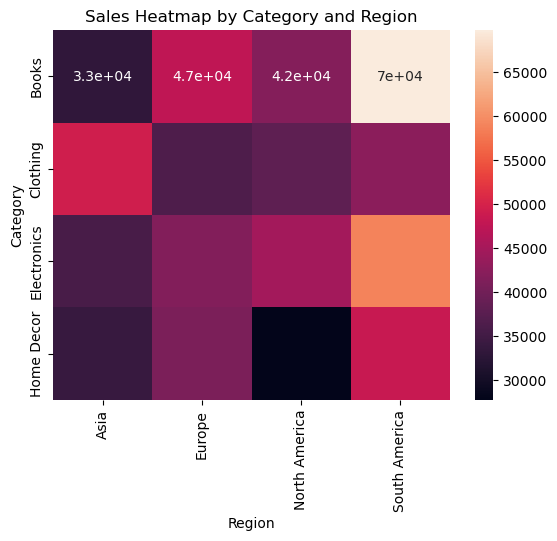

In [61]:
pivot_table = merged_data.merge(products, on='ProductID').pivot_table(
    index='Category', columns='Region', values='TotalValue', aggfunc='sum')

sns.heatmap(pivot_table, annot=True)
plt.title('Sales Heatmap by Category and Region')
plt.show()

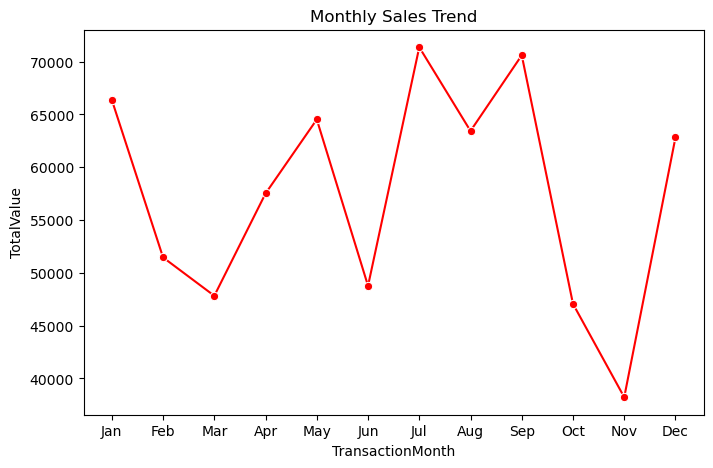

In [62]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=monthly_sales, marker='o', color='red')
plt.title('Monthly Sales Trend')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [63]:
df = transactions.merge(products, on="ProductID")

# Calculate total revenue per product
top_products = df.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False)
print(top_products.head(10))

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [64]:
df = transactions.merge(customers, on="CustomerID")

# Total revenue by region
regional_sales = df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print(regional_sales)

# Number of transactions by region
transaction_count = df.groupby("Region")["TransactionID"].nunique().sort_values(ascending=False)
print(transaction_count)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64
Region
South America    304
North America    244
Europe           234
Asia             218
Name: TransactionID, dtype: int64


In [65]:
customer_lifetime_value = df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)
print(customer_lifetime_value.head(10))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='MonthYear'>

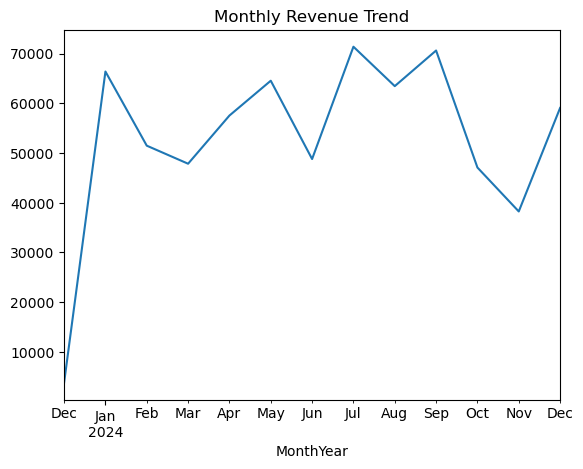

In [66]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["MonthYear"] = df["TransactionDate"].dt.to_period("M")

# Monthly revenue analysis
monthly_revenue = df.groupby("MonthYear")["TotalValue"].sum()
monthly_revenue.plot(kind="line", title="Monthly Revenue Trend")

In [67]:
df = transactions.merge(products, on="ProductID")
top_selling_products = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
print(top_selling_products.head(10))

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [68]:
average_order_value = df["TotalValue"].sum() / df["TransactionID"].nunique()
print(f"Average Order Value: {average_order_value}")

Average Order Value: 689.9955600000001


In [69]:
repeat_customers = df.groupby("CustomerID")["TransactionID"].count()
repeat_customers = repeat_customers[repeat_customers > 1]
print(f"Number of repeat customers: {len(repeat_customers)}")

Number of repeat customers: 187


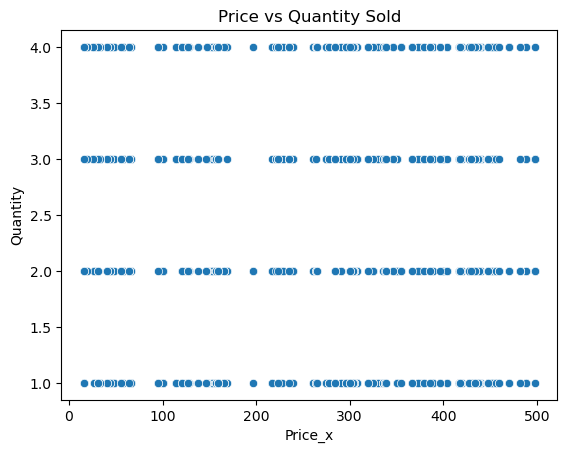

In [70]:
df = transactions.merge(products, on="ProductID")
sns.scatterplot(x=df["Price_x"], y=df["Quantity"],palette='hue')
plt.title("Price vs Quantity Sold")
plt.show()